# **1. Introduction & Setup**

This initial section provides a brief overview of the project's goal: to build a prototype AI system for analyzing political statements in Kenya and assessing the risk of post-election violence. It also includes the necessary Python libraries for the project, along with instructions for their installation.

In [1]:
# Import necessary libraries
import re
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download the VADER lexicon for sentiment analysis
# This only needs to be run once
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# **2. Data Loading & Preprocessing**

This section handles the loading and cleaning of the dummy data. The raw text data is parsed to extract the speaker, timestamp, and the statement itself. This cleaned data is then structured into a pandas DataFrame for easier manipulation and analysis.

In [2]:
import re
import pandas as pd

# Raw data provided in the prompt
data = """
President - 2027-11-15 14:30:00 - "We will not tolerate any attempts to undermine the will of the people! Those who seek to sow discord and chaos must be held accountable for their actions. Let no one mistake our resolve!"
President - 2027-11-16 09:15:00 - "The reports of irregularities are deeply concerning. We demand a full and transparent investigation, and we will not hesitate to take action if necessary to protect the integrity of our electoral process.'
President - 2027-11-17 16:48:00 - "I urge all Kenyans to remain calm and patient as we work through these challenging times. We must resist the divisive rhetoric that seeks to pit us against one another!"
Minister of Internal Security - 2027-11-15 11:02:00 - "The security situation remains delicate, and we are deploying additional resources to maintain order and prevent any escalation of violence. We will not allow criminals and troublemakers to disrupt the peace."
Minister of Internal Security - 2027-11-16 18:55:00 - "Let me be clear: anyone attempting to incite unrest or engage in unlawful behavior will face swift and decisive consequences. The rule of law must prevail!"
Minister of Internal Security - 2027-11-17 08:21:00 - "We are monitoring the situation closely and taking all necessary steps to ensure the safety and security of our citizens. Some individuals are exploiting anxieties for their own gain."
Security Committee Leader - 2027-11-15 13:37:00 - "The tensions in [Region Name] are palpable, and we urge residents to remain vigilant and report any suspicious activity to the authorities. We must protect our communities!"
Security Committee Leader - 2027-11-16 04:19:00 - "There have been reports of increased mobilization along ethnic lines, which is deeply worrying. We need to address these divisions before they erupt into violence."
President - 2027-11-18 10:53:00 - "I want to assure the people that we are doing everything in our power to ensure a fair and just outcome. Some voices are deliberately spreading misinformation, attempting to mislead the public!"
Minister of Internal Security - 2027-11-19 16:28:00 - "We have identified several individuals involved in spreading false rumors and inciting violence. We will not hesitate to bring them to justice."
Security Committee Leader - 2027-11-20 09:45:00 - "The situation is becoming increasingly volatile, and we are prepared to take all necessary measures to maintain order. We cannot allow a small group of agitators to dictate the future of our nation."
President - 2027-11-21 13:11:00 - "Let me be absolutely clear: any attempt to disrupt the electoral process will be met with an iron fist! We will not tolerate anarchy!"
Minister of Internal Security - 2027-11-22 18:34:00 - "We are urging all political leaders to exercise restraint and refrain from making inflammatory statements that could further exacerbate tensions."
Security Committee Leader - 2027-11-23 05:59:00 - "The security forces remain on high alert, ready to respond swiftly to any threats. We must not allow fear to paralyze us!"
President - 2027-11-24 11:26:00 - "I understand the frustrations of many Kenyans, but violence is never the answer. We need dialogue and compromise, not chaos and destruction."
Minister of Internal Security - 2027-11-25 17:03:00 - "We are working with international partners to ensure that Kenya remains a stable and secure nation. We will not allow external forces to interfere in our internal affairs."
Security Committee Leader - 2027-11-26 08:12:00 - "The situation is fragile, and we must remain vigilant against any attempts to destabilize the country. We cannot afford to be complacent!"
President - 2027-11-27 14:47:00 - "I want to reiterate my commitment to upholding the rule of law and ensuring that all Kenyans are treated with dignity and respect."
Minister of Internal Security - 2027-11-28 19:31:00 - "We will not tolerate any form of intimidation or harassment. Those who engage in such behavior will be brought to justice."
Security Committee Leader - 2027-11-29 06:54:00 - "The security situation remains tense, and we urge residents to cooperate with law enforcement officials. We must work together to maintain peace and stability."
President - 2027-11-30 12:18:00 - "Let me be clear: the integrity of this election is paramount. Any attempts to challenge the results will be met with a firm response."
Minister of Internal Security - 2027-11-31 18:05:00 - "We are deploying additional personnel to hotspots and urging citizens to remain calm and avoid engaging in any provocative behavior."
Security Committee Leader - 2027-12-01 09:23:00 - "The situation is deteriorating rapidly. We need immediate action to prevent further violence."
President - 2027-12-02 15:47:00 - "I call on all Kenyans to reject the divisive rhetoric and embrace unity."
Minister of Internal Security - 2027-12-03 20:19:00 - "We are prepared to use force if necessary to maintain order."
Security Committee Leader - 2027-12-04 07:36:00 - "The risk of escalation is extremely high. We must act decisively."
President - 2027-12-05 11:58:00 - "Let us not repeat the mistakes of the past."
Minister of Internal Security - 2027-12-06 17:24:00 - "We are monitoring all communications and taking action against those spreading misinformation."
Security Committee Leader - 2027-12-07 08:41:00 - "The time for dialogue is over. We need immediate intervention."
"""

# Function to parse the raw data
def parse_data(data):
    """
    This function takes a string of text as input, parses it line by line,
    and extracts speaker, timestamp, and statement from each line.
    
    Args:
        data (str): A string containing raw data in the specified format.
        
    Returns:
        list: A list of lists, where each sublist contains speaker, timestamp, and statement.
    """
    
    # Split the input string into lines
    lines = data.strip().split('\n')
    
    # Initialize an empty list to store parsed data
    parsed_data = []
    
    # Loop through each line in the data
    for line in lines:
        # Use a regular expression to match speaker, timestamp, and statement
        match = re.search(r'(?P<speaker>[^ -]+) - (?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - "(?P<statement>.*)"', line)
        
        # If a match is found, extract speaker, timestamp, and statement
        if match:
            speaker = match.group('speaker')
            timestamp = match.group('timestamp')
            statement = match.group('statement')
            
            # Append the extracted data to parsed_data list
            parsed_data.append([speaker, timestamp, statement])
    
    # Return the parsed data
    return parsed_data

# Import necessary libraries
import re
import pandas as pd

# Parse the raw data
parsed_data = parse_data(data)

# Create a DataFrame from the parsed data
df = pd.DataFrame(parsed_data, columns=['speaker', 'timestamp', 'statement'])

# Print the resulting DataFrame
print(df)


      speaker            timestamp  \
0   President  2027-11-15 14:30:00   
1   President  2027-11-17 16:48:00   
2    Security  2027-11-15 11:02:00   
3    Security  2027-11-16 18:55:00   
4    Security  2027-11-17 08:21:00   
5      Leader  2027-11-15 13:37:00   
6      Leader  2027-11-16 04:19:00   
7   President  2027-11-18 10:53:00   
8    Security  2027-11-19 16:28:00   
9      Leader  2027-11-20 09:45:00   
10  President  2027-11-21 13:11:00   
11   Security  2027-11-22 18:34:00   
12     Leader  2027-11-23 05:59:00   
13  President  2027-11-24 11:26:00   
14   Security  2027-11-25 17:03:00   
15     Leader  2027-11-26 08:12:00   
16  President  2027-11-27 14:47:00   
17   Security  2027-11-28 19:31:00   
18     Leader  2027-11-29 06:54:00   
19  President  2027-11-30 12:18:00   
20   Security  2027-11-31 18:05:00   
21     Leader  2027-12-01 09:23:00   
22  President  2027-12-02 15:47:00   
23   Security  2027-12-03 20:19:00   
24     Leader  2027-12-04 07:36:00   
25  Presiden

# **3. NLP Analysis**

The core of the analysis happens here. The Natural Language Toolkit (NLTK) is used for sentiment analysis. Specifically, the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon is employed to calculate a sentiment score for each political statement. A list of keywords associated with inciteful language is also defined to quantify the level of inflammatory content.

In [3]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define inciteful keywords
inciteful_keywords = [
    'tolerate', 'undermine', 'discord', 'chaos', 'accountable', 'irregularities',
    'violence', 'criminals', 'troublemakers', 'unrest', 'unlawful', 'consequences',
    'tensions', 'mobilization', 'ethnic', 'divisions', 'misinformation', 'agitators',
    'anarchy', 'inflammatory', 'threats', 'fear', 'destabilize', 'intimidation',
    'harassment', 'provocative', 'deteriorating', 'force', 'escalation', 'intervention'
]

# Function to calculate sentiment score
def get_sentiment_score(statement):
    return sid.polarity_scores(statement)['compound']

# Function to count inciteful keywords
def count_inciteful_keywords(statement):
    count = 0
    for word in inciteful_keywords:
        if word in statement.lower():
            count += 1
    return count

# **4. Feature Extraction**

Based on the NLP analysis, this section creates numerical features for each statement. These features include the calculated sentiment score and the frequency of inciteful keywords. These numerical representations will be used to calculate the final probability score.

In [4]:
# Apply the functions to the DataFrame
df['sentiment_score'] = df['statement'].apply(get_sentiment_score)
df['inciteful_keyword_count'] = df['statement'].apply(count_inciteful_keywords)

# **5. Probability Score Calculation**

A tiered leader weighting system is implemented in this section to calculate a probability score for each statement. This system assigns different weights to statements based on the speaker's role (President, Minister of Internal Security, or Security Committee Leader). The formula combines the sentiment, inciteful keyword count, and the speaker's weight to produce a final risk score.

In [5]:
# Define weights for each leader tier
leader_weights = {
    'President': 0.5,
    'Minister of Internal Security': 0.3,
    'Security Committee Leader': 0.2
}

# Function to calculate the probability score
def calculate_probability_score(row):
    # This is a simple formula for demonstration.
    # It can be made more sophisticated.
    # We use the absolute value of sentiment for negative statements
    # and add the keyword count, then multiply by the leader's weight.
    base_score = (abs(row['sentiment_score']) * (1 + row['inciteful_keyword_count']))
    weighted_score = base_score * leader_weights.get(row['speaker'], 0)
    return weighted_score

# Apply the function to the DataFrame
df['probability_score'] = df.apply(calculate_probability_score, axis=1)

# **6. Output & Visualization**

This section presents the results of the analysis. It prints the DataFrame containing the original statement, its sentiment score, the frequency of inciteful keywords, and the final calculated probability score. A bar chart is also generated to visualize the distribution of these probability scores, providing a clear overview of the risk levels associated with the analyzed statements

                                                                                                                                                                                                           statement  sentiment_score  inciteful_keyword_count  probability_score
0                         We will not tolerate any attempts to undermine the will of the people! Those who seek to sow discord and chaos must be held accountable for their actions. Let no one mistake our resolve!          -0.8802                        5            2.64060
1                                           I urge all Kenyans to remain calm and patient as we work through these challenging times. We must resist the divisive rhetoric that seeks to pit us against one another!           0.4926                        0            0.24630
2   The security situation remains delicate, and we are deploying additional resources to maintain order and prevent any escalation of violence. We will not allow criminals and t

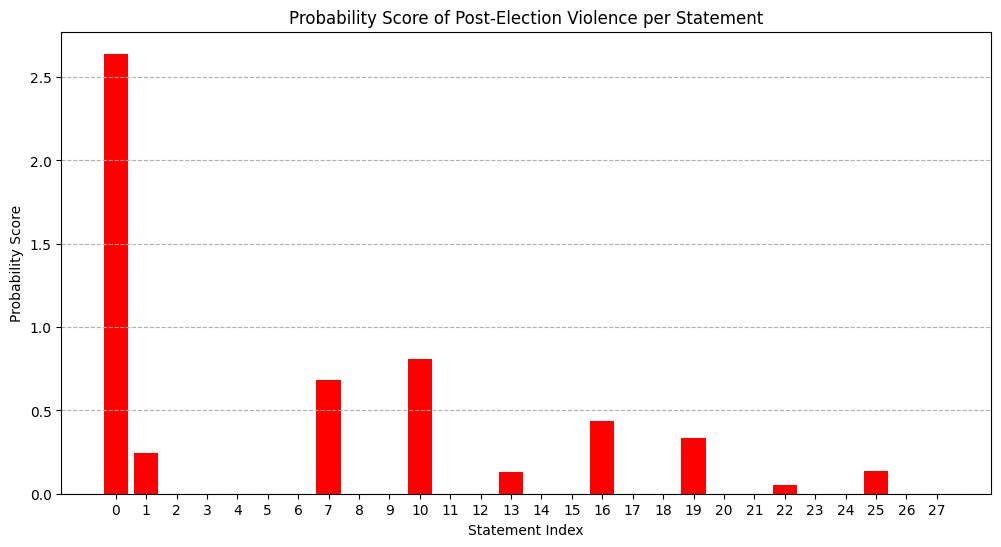

In [6]:
# Display the results
print(df[['statement', 'sentiment_score', 'inciteful_keyword_count', 'probability_score']].to_string())

# Visualize the probability scores
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['probability_score'], color='red')
plt.xlabel('Statement Index')
plt.ylabel('Probability Score')
plt.title('Probability Score of Post-Election Violence per Statement')
plt.xticks(df.index)
plt.grid(axis='y', linestyle='--')
plt.show()

Bar chart showing the probalility scores of each statement. THe x-axis represents the statement index, and the y-axis represents the calculated probabilty score. The scores vary across the statements, with some showing significantly higher probability scores than others.